In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import ast
from mgua import *
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.manifold import TSNE


import random as rnd
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [2]:

# БЕЗ ВКЛЮЧЕННЫХ МАРКЕРОВ

In [3]:
tab1 = pd.read_csv("data_varvara/cox2/cox2_matrix_alphabet_NN***_UpTo2chains.csv")
tab2 = pd.read_csv("data_varvara/cox2/cox2_matrix_alphabet_NN***_UpTo3chains.csv")
tab3 = pd.read_csv("data_varvara/cox2/cox2_matrix_alphabet_NN***_UpTo4chains.csv")
tab4 = pd.read_csv("data_varvara/cox2/cox2_matrix_alphabet_NN***_UpTo5chains.csv")

tab1.shape, tab2.shape, tab3.shape, tab4.shape

((467, 11), (467, 29), (467, 53), (467, 89))

In [4]:
tab1["key"] = [i for i in range(tab1.shape[0])]
tab2["key"] = [i for i in range(tab2.shape[0])]
tab3["key"] = [i for i in range(tab3.shape[0])]
tab4["key"] = [i for i in range(tab4.shape[0])]

In [5]:
tab = pd.merge(tab1, tab2, left_on="key", right_on="key", how="inner")
tab = pd.merge(tab, tab3, left_on="key", right_on="key", how="inner")
tab = pd.merge(tab, tab4, left_on="key", right_on="key", how="inner")

In [6]:
for i in tab.keys():
    print(i+"; ",end="")

Br***C***; C***C***; C***Cl***; C***F***; C***N***; C***O***; C***S***; N***N***; N***O***; N***S***; O***S***; key; Br***C***C***; Br***C***S***; C***C***C***; C***C***Cl***; C***C***F***; C***C***N***; C***C***O***; C***C***S***; C***N***C***; C***N***N***; C***N***O***; C***N***S***; C***O***C***; C***O***N***; C***S***C***; C***S***N***; C***S***O***; Cl***C***S***; F***C***F***; F***C***O***; F***C***S***; N***C***N***; N***C***O***; N***C***S***; N***S***O***; O***C***O***; O***C***S***; O***N***O***; O***S***O***; Br***C***C***C***; Br***C***C***N***; Br***C***C***O***; Br***C***C***S***; Br***C***S***C***; C***C***C***C***; C***C***C***Cl***; C***C***C***F***; C***C***C***N***; C***C***C***O***; C***C***C***S***; C***C***N***C***; C***C***N***N***; C***C***N***O***; C***C***N***S***; C***C***O***C***; C***C***O***N***; C***C***S***C***; C***C***S***N***; C***C***S***O***; C***N***C***N***; C***N***C***O***; C***N***C***S***; C***N***N***C***; C***N***O***C***; C***N***S***C***;

In [7]:
tab = tab.drop("key",axis=1)
tab.shape

(467, 182)

In [8]:
tab.head()

,Br***C***,C***C***,C***Cl***,C***F***,C***N***,C***O***,C***S***,N***N***,N***O***,N***S***,...,N***C***C***C***O***,N***C***C***C***S***,N***C***C***N***N***,N***C***C***N***O***,N***C***C***O***N***,N***C***C***S***O***,N***N***C***C***O***,N***N***C***C***S***,N***O***C***C***O***,S***C***C***C***S***
0,0.0,17.0,0.0,1.0,3.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,16.0,0.0,1.0,3.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,16.0,0.0,1.0,3.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,17.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,18.0,0.0,3.0,3.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
y = pd.read_csv("data_varvara/cox2/cox2_y.csv")

In [10]:
y = np.array(y)

In [11]:
r = []
for i in y:
    s = i[0]
    s = re.sub('inf', '1_000_000_000', str(s))
    r.append(ast.literal_eval(s))

In [12]:
y = np.array(r)
for i in range(y.shape[0]):
    if y[i,1] == 1_000_000_000:
        y[i,1] = np.inf

In [13]:
X = np.array(tab)

In [14]:
rnd.seed(2)

In [15]:
my_pca = PCA(2)

In [16]:
X_pca = my_pca.fit_transform(X)

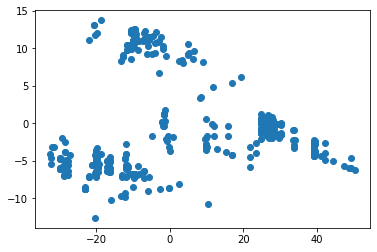

In [17]:
plt.scatter(X_pca[:,0], X_pca[:,1])


In [18]:
my_tsne = TSNE()
X_tsne = my_tsne.fit_transform(X)

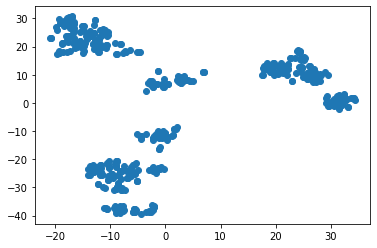

In [19]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])

In [205]:
X_tf = TfidfTransformer().fit_transform(X)

# AGGL 5 clust


In [123]:
aggl = AgglomerativeClustering(n_clusters=5, linkage="complete", affinity="manhattan")
# dbscan = DBSCAN(eps=0.04, min_samples=7, metric="cosine"

In [124]:
# res = dbscan.fit_predict(X_tf)

In [125]:
res = aggl.fit_predict(X_tsne)


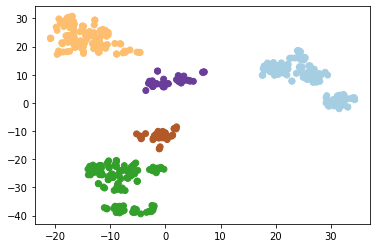

In [126]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=res, cmap=plt.cm.Paired)

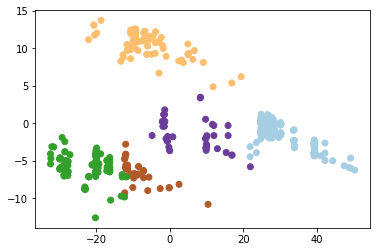

In [127]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=res, cmap=plt.cm.Paired)

In [128]:
silhouette_score(X,res)

0.41542619864469715

In [129]:
cluster_structure = res

In [130]:
mdl = Ridge(300)


In [131]:
y_new = []
ans_all = []
iterat = 1 
for i in np.unique(cluster_structure):
    if i == -1:
        continue
    X_in_clust = X[np.where(res==i)[0],:]
    y_in_clust = y[np.where(res==i)[0],0]
    ans = []
    
    for train_index, test_index in KFold(min(10, X_in_clust.shape[0])).split(X_in_clust):
        
        
        X_train = X_in_clust[train_index, :]
        y_train = y_in_clust[train_index]

        X_test = X_in_clust[test_index, :]
        y_test = y_in_clust[test_index]
        
        
        mdl.fit(X_train, y_train)
        for j in mdl.predict(X_test):
            ans.append(j)
        for j in mdl.predict(X_test):
            ans_all.append(j)
        for j in y_test:
            y_new.append(j)
    print ("Значения ошибок на " + str(iterat) + "-ом кластере размера " + str(X_in_clust.shape[0]))
    print()
    print("MSE " + str(round(MSE(ans,y_in_clust[:]),4)))
    print()
    print("MAE " + str(round(MAE(ans,y_in_clust[:]),4)))
    print()
    print("\\(R^2\\) " + str(round(r2_score(y_in_clust[:], ans),4)))
    print()
    print("\\bigskip")
    print()
    iterat+=1

Значения ошибок на 1-ом кластере размера 127

MSE 581.2913

MAE 13.1573

\(R^2\) 0.0086

\bigskip

Значения ошибок на 2-ом кластере размера 136

MSE 867.9436

MAE 18.7419

\(R^2\) 0.0706

\bigskip

Значения ошибок на 3-ом кластере размера 120

MSE 1464.2152

MAE 29.6257

\(R^2\) 0.011

\bigskip

Значения ошибок на 4-ом кластере размера 46

MSE 768.3743

MAE 15.6832

\(R^2\) -0.1656

\bigskip

Значения ошибок на 5-ом кластере размера 38

MSE 2082.3999

MAE 39.027

\(R^2\) -0.0321

\bigskip



# AGGL 7 clust

In [132]:
aggl = AgglomerativeClustering(n_clusters=7, linkage="complete", affinity="cosine")

In [138]:
res = aggl.fit_predict(X_tsne)
cluster_structure = res

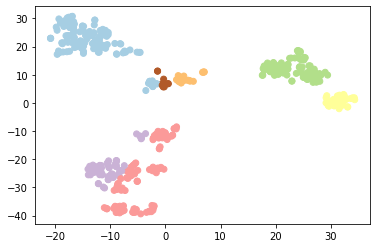

In [139]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=res, cmap=plt.cm.Paired)

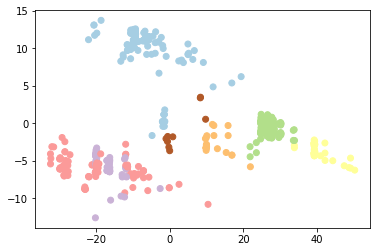

In [140]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=res, cmap=plt.cm.Paired)

In [141]:
silhouette_score(X,res)

0.22392004119632528

In [144]:
mdl = Ridge(30)

In [149]:
y_new = []
ans_all = []
iterat = 1 
for i in np.unique(cluster_structure):
    if i == -1:
        continue
    X_in_clust = X[np.where(res==i)[0],:]
    y_in_clust = y[np.where(res==i)[0],0]
    ans = []
    
    for train_index, test_index in KFold(min(10, X_in_clust.shape[0])).split(X_in_clust):
        
        
        X_train = X_in_clust[train_index, :]
        y_train = y_in_clust[train_index]

        X_test = X_in_clust[test_index, :]
        y_test = y_in_clust[test_index]
        
        
        mdl.fit(X_train, y_train)
        for j in mdl.predict(X_test):
            ans.append(j)
        for j in mdl.predict(X_test):
            ans_all.append(j)
        for j in y_test:
            y_new.append(j)
    print ("Значения ошибок на " + str(iterat) + "-ом кластере размера " + str(X_in_clust.shape[0]))
    print()
    print("MSE " + str(round(MSE(ans,y_in_clust[:]),4)))
    print()
    print("MAE " + str(round(MAE(ans,y_in_clust[:]),4)))
    print()
    print("\\(R^2\\) " + str(round(r2_score(y_in_clust[:], ans),4)))
    print()
    print("\\bigskip")
    print()
    iterat+=1
print("\\bigskip")
print()
print("\\textbf{ИТОГОВЫЕ ОШИБКИ НА ВСЕЙ ВЫБОРКЕ:}")
print()
print("MSE " + str(round(MSE(ans_all,y_new[:]))))
print()
print("MAE " + str(round(MAE(ans_all,y_new[:]),4)))
print()
print("\\(R^2\\) " + str(round(r2_score(y_new[:], ans_all),4)))
print()
print("\\bigskip")

Значения ошибок на 1-ом кластере размера 134

MSE 1595.7883

MAE 30.9056

\(R^2\) -0.1264

\bigskip

Значения ошибок на 2-ом кластере размера 88

MSE 613.8331

MAE 14.1511

\(R^2\) -0.0379

\bigskip

Значения ошибок на 3-ом кластере размера 116

MSE 1296.807

MAE 24.8004

\(R^2\) -0.1236

\bigskip

Значения ошибок на 4-ом кластере размера 23

MSE 1172.4629

MAE 21.8678

\(R^2\) -0.3442

\bigskip

Значения ошибок на 5-ом кластере размера 58

MSE 1932.9293

MAE 27.137

\(R^2\) -0.44

\bigskip

Значения ошибок на 6-ом кластере размера 39

MSE 597.9076

MAE 14.3933

\(R^2\) -0.0402

\bigskip

Значения ошибок на 7-ом кластере размера 9

MSE 0.2712

MAE 0.3811

\(R^2\) -0.157

\bigskip

\bigskip

\textbf{ИТОГОВЫЕ ОШИБКИ НА ВСЕЙ ВЫБОРКЕ:}

MSE 1243.0

MAE 23.3515

\(R^2\) -0.1346

\bigskip


# DBSCAN

In [178]:
dbscan = DBSCAN(eps=0.04, min_samples=7, metric="cosine")

In [179]:
res = dbscan.fit_predict(X_tsne)
cluster_structure = res

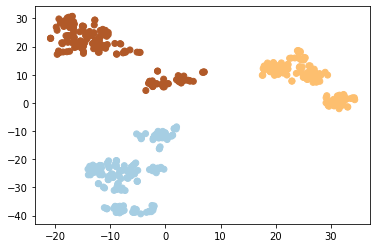

In [180]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=res, cmap=plt.cm.Paired)

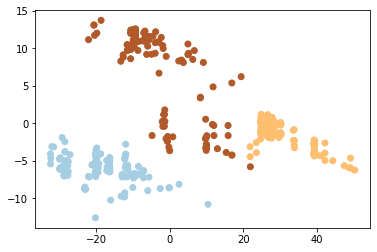

In [181]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=res, cmap=plt.cm.Paired)

In [182]:
silhouette_score(X,res)

0.4193366784079878

In [189]:
mdl = Ridge(3)

In [190]:
y_new = []
ans_all = []
iterat = 1 
for i in np.unique(cluster_structure):
    if i == -1:
        continue
    X_in_clust = X[np.where(res==i)[0],:]
    y_in_clust = y[np.where(res==i)[0],0]
    ans = []
    
    for train_index, test_index in KFold(min(10, X_in_clust.shape[0])).split(X_in_clust):
        
        
        X_train = X_in_clust[train_index, :]
        y_train = y_in_clust[train_index]

        X_test = X_in_clust[test_index, :]
        y_test = y_in_clust[test_index]
        
        
        mdl.fit(X_train, y_train)
        for j in mdl.predict(X_test):
            ans.append(j)
        for j in mdl.predict(X_test):
            ans_all.append(j)
        for j in y_test:
            y_new.append(j)
    print ("Значения ошибок на " + str(iterat) + "-ом кластере размера " + str(X_in_clust.shape[0]))
    print()
    print("MSE " + str(round(MSE(ans,y_in_clust[:]),4)))
    print()
    print("MAE " + str(round(MAE(ans,y_in_clust[:]),4)))
    print()
    print("\\(R^2\\) " + str(round(r2_score(y_in_clust[:], ans),4)))
    print()
    print("\\bigskip")
    print()
    iterat+=1
print("\\bigskip")
print()
print("\\textbf{ИТОГОВЫЕ ОШИБКИ НА ВСЕЙ ВЫБОРКЕ:}")
print()
print("MSE " + str(round(MSE(ans_all,y_new[:]))))
print()
print("MAE " + str(round(MAE(ans_all,y_new[:]),4)))
print()
print("\\(R^2\\) " + str(round(r2_score(y_new[:], ans_all),4)))
print()
print("\\bigskip")

Значения ошибок на 1-ом кластере размера 174

MSE 1238.4802

MAE 25.1654

\(R^2\) -0.0177

\bigskip

Значения ошибок на 2-ом кластере размера 127

MSE 588.2293

MAE 12.5247

\(R^2\) -0.0033

\bigskip

Значения ошибок на 3-ом кластере размера 166

MSE 1308.2869

MAE 27.6894

\(R^2\) -0.0124

\bigskip

\bigskip

\textbf{ИТОГОВЫЕ ОШИБКИ НА ВСЕЙ ВЫБОРКЕ:}

MSE 1086.0

MAE 22.6249

\(R^2\) 0.0087

\bigskip


In [102]:
# y_new = []
# ans_all = []
# for i in np.unique(cluster_structure):
#     if i == -1:
#         continue
#     X_in_clust = X[np.where(res==i)[0],:]
#     y_in_clust = y[np.where(res==i)[0],0]
#     ans = []
    
#     for train_index, test_index in KFold(min(3, X_in_clust.shape[0])).split(X_in_clust):
        
        
#         X_train = X_in_clust[train_index, :]
#         y_train = y_in_clust[train_index]

#         X_test = X_in_clust[test_index, :]
#         y_test = y_in_clust[test_index]
        
        
#         mgua = MGUA(10,10, model=Ridge(alpha=1, normalize=True))
#         mgua.fit(X_train, y_train)
#         indexes = mgua.get_indexes()[0]
#         print(X_train.shape, indexes)
#         X_train = X_train[:,indexes]
#         X_test = X_test[:,indexes]
#         print(X_train.shape)
#         mdl.fit(X_train, y_train)
#         for j in mdl.predict(X_test):
#             ans.append(j)
#         for j in mdl.predict(X_test):
#             ans_all.append(j)
#         for j in y_test:
#             y_new.append(j)
#     print(MSE(ans,y_in_clust[:]), MAE(ans,y_in_clust[:]))
#     print()

In [75]:
print(MSE(ans_all,y_new[:]), MAE(ans_all,y_new[:]),y_in_clust.shape)

1014.3290002977992 21.189786120017416 (41,)


In [76]:
r2_score(y_new, ans_all)

0.07448084278825406

In [172]:
def plot_answer(ans, true):
    
    x = [i for i in range(len(ans))]
    
    fig = plt.figure(figsize=(17,10))
    ax = fig.add_subplot(1, 1, 1)
    ax.legend()
    
    ax.scatter(x, ans, alpha=0.8, c="blue", label="Answer")
    ax.scatter(x, true, alpha=0.8, c="red", label="True")
    ax.legend(loc='upper left', fontsize=20)
    
    
    plt.show()

No handles with labels found to put in legend.


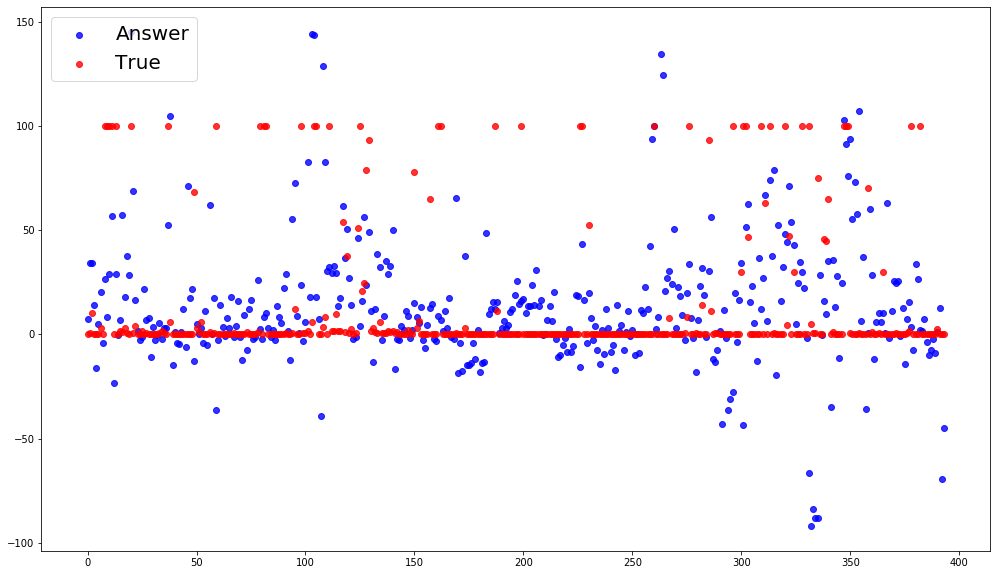

In [173]:
plot_answer(ans_all, y_new)